**Capstone Project — The Battle of Neighbourhoods**

**Introduction**

Kochi is a major city of India. It is a part of Ernakulam district. The city itself has a population of more than a million.

Called the "Queen of the Arabian Sea", Kochi was an important spice trading centre on the west coast of India from the 14th century onward, and maintained a trade network with Arab merchants from the pre-Islamic era. Occupied by the Portuguese in 1503, Kochi was the first of the European colonies in colonial India.

The official language of Malayalam. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in Kochi, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of Kochi .

**Questions that can be asked using the above mentioned datasets**

->What is best location in Kochi for Chinese Cuisine ?

->Which areas have large number of Chinese Resturant Market ?

->Which all areas have less number of resturant ?

->Which is the best place to stay if I prefer Chinese Cuisine ?

->What places are have best restaurant in Kochi?

**Data**

For this project we need the following data :

->Kochi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    
    ->Data source : Zomato kaggel dataset(https://www.kaggle.com/shrutimehta/zomato-restaurants-data)
    
    ->Description : This data set contains the required information. And we will use this data set to explore various    locality of Kochi city.

Nearby places in each locality of Kochi city.
    Data source : Fousquare API (https://developer.foursquare.com/)
    
    Description : By using this api we will get all the venues in each neighborhood.

**Approach**
->Collect the Kochi city data from Zomato kaggel dataset

->Using FourSquare API we will find all venues for each neighborhood.

->Filter out all venues that are nearby by locality.

->Using aggregative rating for each resturant to find the best places.

->Visualize the Ranking of neighborhoods using folium library(python)

**Importing necassary libraries**

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done

# All requested packages already installed.

     |████████████████████████████████| 102kB 8.3MB/s eta 0:00:01


**Read the zomato resturant data from csv file**

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'Kochi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,900682,Nawras Seafood Restaurant,1,Kochi,"Near Pullepadi Bus stop, Chittoor Road, Kochi",Chittoor Road,"Chittoor Road, Kochi",76.285001,9.979363,Seafood,...,Indian Rupees(Rs.),No,No,No,No,3,4.6,Dark Green,Excellent,289
1,95361,Ifthar,1,Kochi,"KK Building, Opposite Pittappillil, Edappally,...",Edappally,"Edappally, Kochi",76.310019,10.028047,Kerala,...,Indian Rupees(Rs.),No,No,No,No,1,3.8,Yellow,Good,281
2,95421,Dhe Puttu,1,Kochi,"NH 47, Edapally Bypass, Edappally, Kochi",Edappally,"Edappally, Kochi",76.310631,10.020683,Kerala,...,Indian Rupees(Rs.),No,Yes,No,No,2,4.4,Green,Very Good,662
3,95256,Kashi Art Cafe,1,Kochi,"Burgher Street, Fort Kochi, Kochi",Fort Kochi,"Fort Kochi, Kochi",76.242981,9.966783,"European, Cafe",...,Indian Rupees(Rs.),No,No,No,No,2,4.2,Green,Very Good,659
4,95286,Grand Hotel Restaurant,1,Kochi,"Grand Hotel, MG Road, Kochi","Grand Hotel, MG Road","Grand Hotel, MG Road, Kochi",76.285447,9.970717,"North Indian, Kerala, Chinese, Continental",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,394


**Data Cleaning**

remove the unwanted columns and rows from dataset

In [7]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Nawras Seafood Restaurant,Chittoor Road,76.285001,9.979363,Seafood,4.6,Excellent,289
1,Ifthar,Edappally,76.310019,10.028047,Kerala,3.8,Good,281
2,Dhe Puttu,Edappally,76.310631,10.020683,Kerala,4.4,Very Good,662
3,Kashi Art Cafe,Fort Kochi,76.242981,9.966783,"European, Cafe",4.2,Very Good,659
4,Grand Hotel Restaurant,"Grand Hotel, MG Road",76.285447,9.970717,"North Indian, Kerala, Chinese, Continental",4.2,Very Good,394


**created map to show the restaurant clusters**

In [10]:
Kochi_Rest = folium.Map(location=[9.97, 76.28], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

Kochi_Rest

In [11]:

df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Nawras Seafood Restaurant,Chittoor Road,76.285001,9.979363,Seafood,4.6,Excellent,289,1
1,Ifthar,Edappally,76.310019,10.028047,Kerala,3.8,Good,281,2
2,Dhe Puttu,Edappally,76.310631,10.020683,Kerala,4.4,Very Good,662,2
3,Kashi Art Cafe,Fort Kochi,76.242981,9.966783,"European, Cafe",4.2,Very Good,659,4
4,Grand Hotel Restaurant,"Grand Hotel, MG Road",76.285447,9.970717,"North Indian, Kerala, Chinese, Continental",4.2,Very Good,394,3


**Which places are have best restaurant in Kochi?**

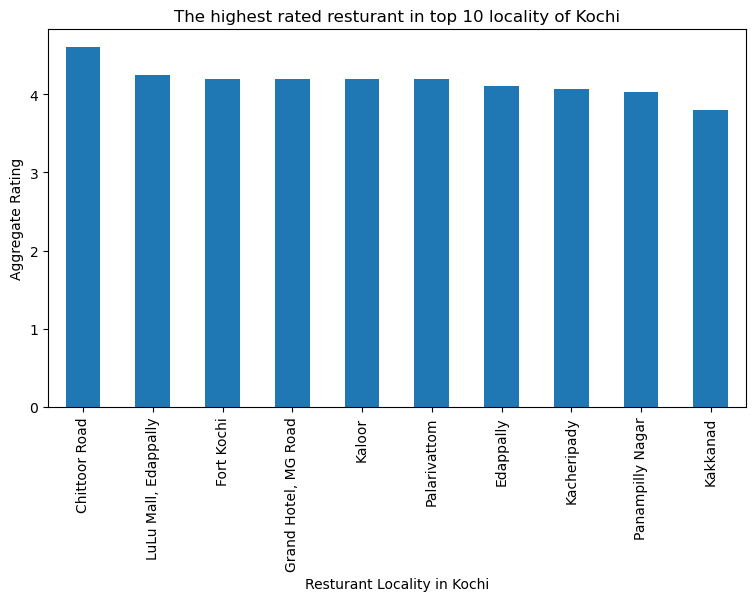

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Kochi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Kochi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The best restarants are available in **Chittoor Road**

**Which places have worst restaurants in Kochi?**

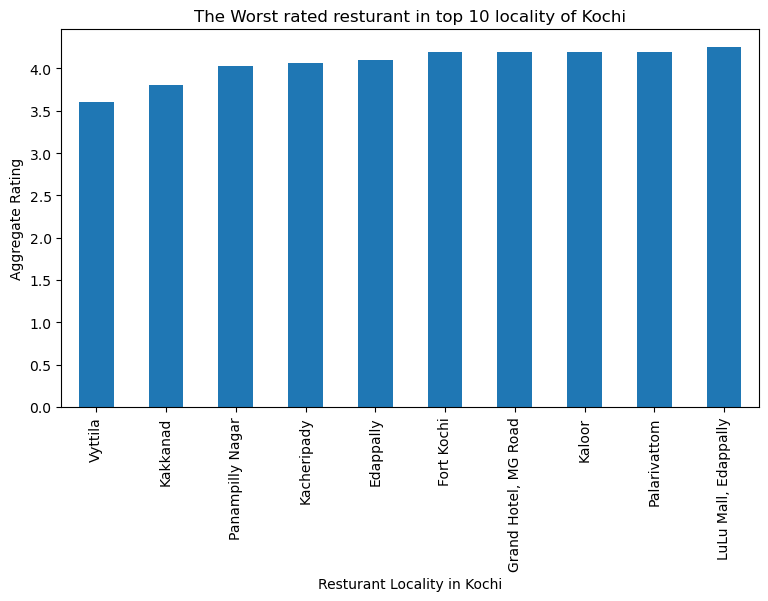

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Kochi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Kochi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in **Vyttila**

**Which place are suitable for edible person in Kochi?**

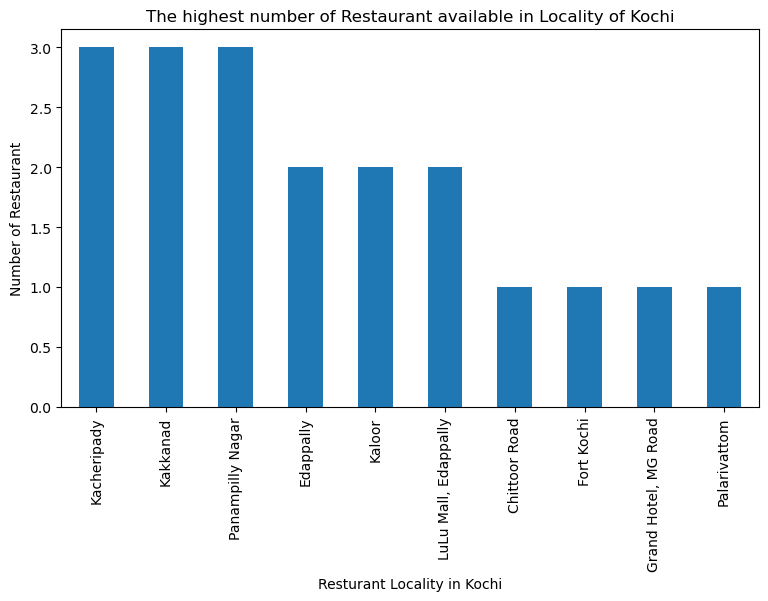

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Kochi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Kochi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

**Kacheripady Kakkanad and Panampilly Nagar** are the best places for edible person to stay there

**Which place are not suitable for edible person in Kochi?**

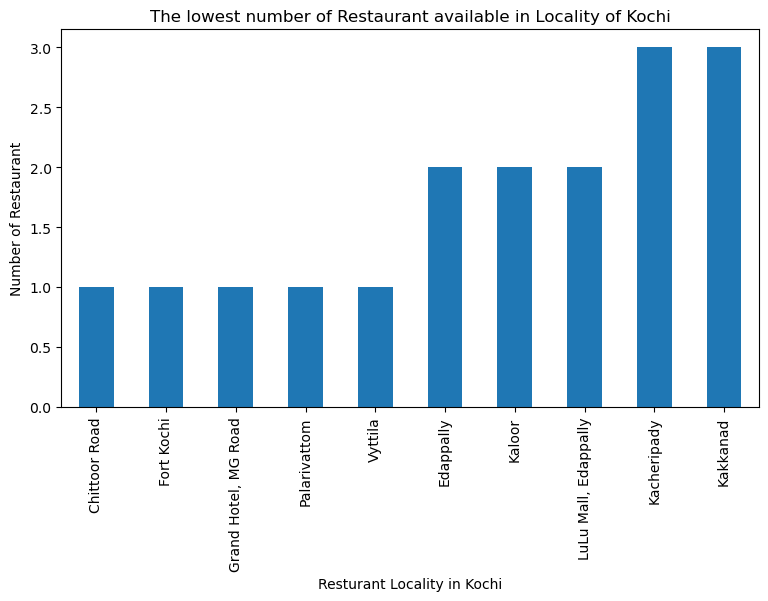

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Kochi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Kochi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

**Which are the best places for chinese restaurant in Kochi?**

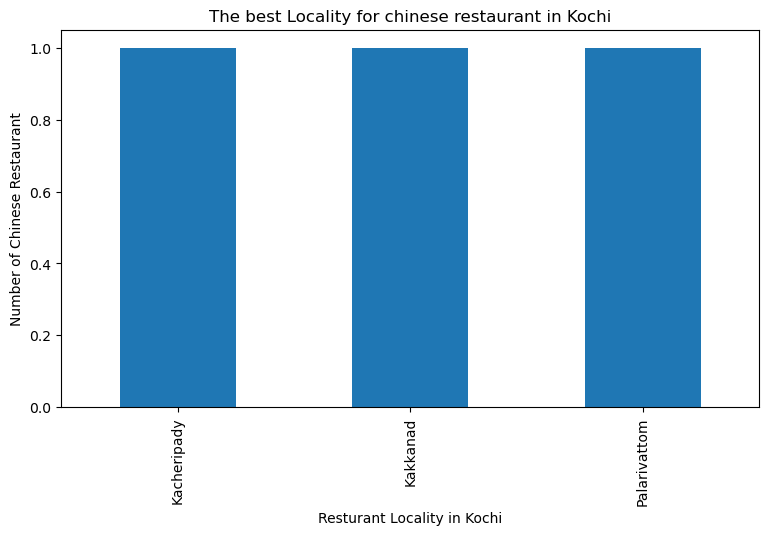

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in Kochi')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Kochi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

**Which places have the best chinese resturants in Kochi?**

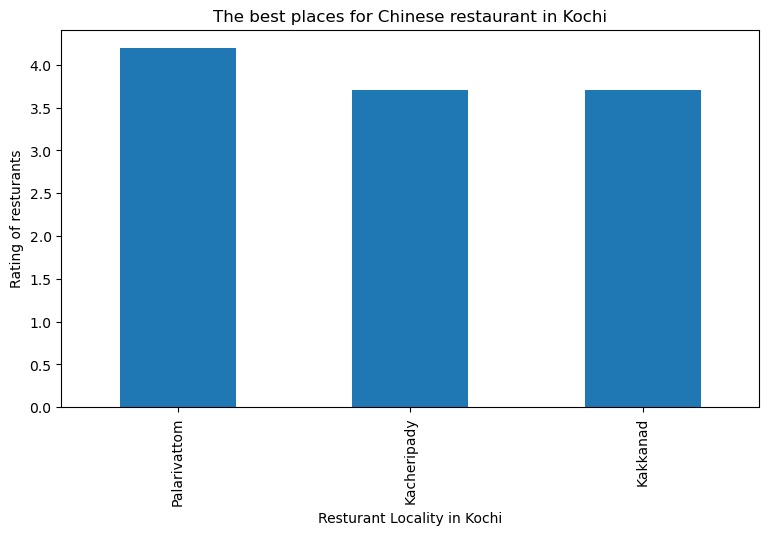

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in Kochi')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Kochi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

**Palarivattom** is the best location for Chinese restaurants

**Data transformation**

Based on Locality grouping the data

In [24]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [25]:

df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,Chittoor Road,9.979363,76.285001,1,Seafood,4.600000,Excellent,289
1,Edappally,10.024365,76.310325,2,"Kerala, Kerala",4.100000,"Good, Very Good",943
2,Fort Kochi,9.966783,76.242981,1,"European, Cafe",4.200000,Very Good,659
3,"Grand Hotel, MG Road",9.970717,76.285447,1,"North Indian, Kerala, Chinese, Continental",4.200000,Very Good,394
4,Kacheripady,9.984676,76.280465,3,"European, North Indian, Mediterranean, America...",4.066667,"Excellent, Good, Very Good",736


In [26]:
df_final.shape

(11, 8)

**Define Foursquare Credentials and Version**

In [27]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'XTIINSTETSPQEYSBCN4RNSIKSYHLUKML2AHRJJPOCMDLIGEH' # Foursquare ID
CLIENT_SECRET = 'FPM23P5JP0T0KJXEYXU0AYA2VWK1UOYGCRS2QD0D4ILNYCXP' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XTIINSTETSPQEYSBCN4RNSIKSYHLUKML2AHRJJPOCMDLIGEH
CLIENT_SECRET:FPM23P5JP0T0KJXEYXU0AYA2VWK1UOYGCRS2QD0D4ILNYCXP


**create a function to repeat the same process to all the Locality in Kochi**

In [28]:

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**find the venues in all Kochi Locality**

In [29]:
# find the venues in all New Delhi Locality
kochi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

Chittoor Road
Edappally
Fort Kochi
Grand Hotel, MG Road
Kacheripady
Kakkanad
Kaloor
LuLu Mall, Edappally
Palarivattom
Panampilly Nagar
Vyttila


In [30]:
kochi_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chittoor Road,9.979363,76.285001,Pai Brothers Fast Food,9.980087,76.283711,Fast Food Restaurant
1,Chittoor Road,9.979363,76.285001,Padma Cinema,9.981664,76.282860,Movie Theater
2,Chittoor Road,9.979363,76.285001,Dollars & Pounds,9.978544,76.284638,Accessories Store
3,Chittoor Road,9.979363,76.285001,Abad plaza,9.978495,76.283609,Plaza
4,Chittoor Road,9.979363,76.285001,cafe coffee day,9.976563,76.284282,Café


In [31]:
kochi_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
Chittoor Road,23,23,23,23,23,23
Edappally,30,30,30,30,30,30
Fort Kochi,29,29,29,29,29,29
"Grand Hotel, MG Road",20,20,20,20,20,20
Kacheripady,21,21,21,21,21,21
Kakkanad,10,10,10,10,10,10
Kaloor,11,11,11,11,11,11
"LuLu Mall, Edappally",41,41,41,41,41,41
Palarivattom,18,18,18,18,18,18


In [32]:
print('There are {} uniques categories.'.format(len(kochi_venues['Venue Category'].unique())))

There are 75 uniques categories.


In [34]:
## Analyze Each Locality

# one hot encoding
kochi_onehot = pd.get_dummies(kochi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
kochi_onehot['Locality'] = kochi_venues['Locality'] 

# move Locality column to the first column
column_list = kochi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
kochi_onehot = kochi_onehot[column_list]

kochi_onehot.head()

,Locality,Accessories Store,Arcade,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,Bowling Alley,...,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Chittoor Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chittoor Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chittoor Road,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chittoor Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chittoor Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
kochi_grouped = kochi_onehot.groupby('Locality').mean().reset_index()
kochi_grouped

,Locality,Accessories Store,Arcade,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,Bowling Alley,...,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Chittoor Road,0.043478,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Edappally,0.000000,0.033333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.0,...,0.000000,0.00,0.033333,0.00000,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333
2,Fort Kochi,0.000000,0.000000,0.034483,0.068966,0.000000,0.000000,0.034483,0.034483,0.0,...,0.000000,0.00,0.000000,0.00000,0.000000,0.034483,0.000000,0.034483,0.000000,0.000000
3,"Grand Hotel, MG Road",0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.050000,0.000000,0.0,...,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kacheripady,0.000000,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kakkanad,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Kaloor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.090909,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"LuLu Mall, Edappally",0.000000,0.024390,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.0,...,0.000000,0.00,0.024390,0.02439,0.000000,0.000000,0.024390,0.000000,0.024390,0.024390
8,Palarivattom,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.00000,0.055556,0.000000,0.000000,0.000000,0.000000,0.111111
9,Panampilly Nagar,0.050000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.050000,0.000000,0.000000,0.050000


In [36]:
kochi_grouped.shape

(11, 76)

In [37]:

num_top_venues = 5

for hood in kochi_grouped['Locality']:
    print("----"+hood+"----")
    temp = kochi_grouped[kochi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Chittoor Road----
                  venue  freq
0  Fast Food Restaurant  0.17
1     Indian Restaurant  0.13
2                  Café  0.13
3        Clothing Store  0.09
4     Accessories Store  0.04


----Edappally----
                  venue  freq
0  Fast Food Restaurant  0.10
1         Shopping Mall  0.07
2             Juice Bar  0.07
3                Bakery  0.07
4     Indian Restaurant  0.07


----Fort Kochi----
                       venue  freq
0                      Hotel  0.21
1          Indian Restaurant  0.10
2                       Café  0.10
3           Asian Restaurant  0.07
4  Cajun / Creole Restaurant  0.03


----Grand Hotel, MG Road----
               venue  freq
0  Indian Restaurant  0.35
1              Hotel  0.10
2               Café  0.05
3     Clothing Store  0.05
4        Art Gallery  0.05


----Kacheripady----
                venue  freq
0   Indian Restaurant  0.24
1  Chinese Restaurant  0.14
2           BBQ Joint  0.10
3      Clothing Store  0.10
4          R

In [38]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = kochi_grouped['Locality']

for ind in np.arange(kochi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kochi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chittoor Road,Fast Food Restaurant,Indian Restaurant,Café,Clothing Store,Accessories Store,Bridal Shop,Pizza Place,Plaza,Pool Hall,Men's Store
1,Edappally,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Juice Bar,Bakery,Shopping Mall,Clothing Store,Vegetarian / Vegan Restaurant,Restaurant,Turkish Restaurant
2,Fort Kochi,Hotel,Indian Restaurant,Café,Asian Restaurant,Italian Restaurant,Seafood Restaurant,Mediterranean Restaurant,Dessert Shop,Coffee Shop,Park
3,"Grand Hotel, MG Road",Indian Restaurant,Hotel,Fried Chicken Joint,Restaurant,Art Gallery,Jewelry Store,Bar,Gastropub,Garden,Soccer Stadium
4,Kacheripady,Indian Restaurant,Chinese Restaurant,BBQ Joint,Clothing Store,Ice Cream Shop,Flea Market,Electronics Store,Hotel,Movie Theater,Punjabi Restaurant
5,Kakkanad,Indian Restaurant,Italian Restaurant,Bus Stop,Department Store,Restaurant,Café,Burger Joint,Bakery,Hotel,Gastropub
6,Kaloor,Café,Department Store,Soup Place,Indian Restaurant,Gym,Kerala Restaurant,Market,Middle Eastern Restaurant,Ice Cream Shop,Beach
7,"LuLu Mall, Edappally",Multiplex,Shopping Mall,Clothing Store,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Juice Bar,Multicuisine Indian Restaurant,Middle Eastern Restaurant,Turkish Restaurant
8,Palarivattom,Indian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Chinese Restaurant,Juice Bar,Pizza Place,Café,Mediterranean Restaurant,Shopping Mall,BBQ Joint
9,Panampilly Nagar,Restaurant,Donut Shop,Indian Restaurant,Vegetarian / Vegan Restaurant,Bakery,Burger Joint,Café,Coffee Shop,Diner,French Restaurant


In [42]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

kochi_clustering = kochi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kochi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(11,)

In [43]:
# add clustering labels
kochi_merged = df_final.head(240)
kochi_merged['Cluster Labels'] = kmeans.labels_

# merge Kochi_grouped with df_Chinese to add latitude/longitude for each Locality
kochi_merged = kochi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

kochi_merged.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chittoor Road,9.979363,76.285001,1,Seafood,4.600000,Excellent,289,3,Fast Food Restaurant,Indian Restaurant,Café,Clothing Store,Accessories Store,Bridal Shop,Pizza Place,Plaza,Pool Hall,Men's Store
1,Edappally,10.024365,76.310325,2,"Kerala, Kerala",4.100000,"Good, Very Good",943,3,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Juice Bar,Bakery,Shopping Mall,Clothing Store,Vegetarian / Vegan Restaurant,Restaurant,Turkish Restaurant
2,Fort Kochi,9.966783,76.242981,1,"European, Cafe",4.200000,Very Good,659,0,Hotel,Indian Restaurant,Café,Asian Restaurant,Italian Restaurant,Seafood Restaurant,Mediterranean Restaurant,Dessert Shop,Coffee Shop,Park
3,"Grand Hotel, MG Road",9.970717,76.285447,1,"North Indian, Kerala, Chinese, Continental",4.200000,Very Good,394,4,Indian Restaurant,Hotel,Fried Chicken Joint,Restaurant,Art Gallery,Jewelry Store,Bar,Gastropub,Garden,Soccer Stadium
4,Kacheripady,9.984676,76.280465,3,"European, North Indian, Mediterranean, America...",4.066667,"Excellent, Good, Very Good",736,4,Indian Restaurant,Chinese Restaurant,BBQ Joint,Clothing Store,Ice Cream Shop,Flea Market,Electronics Store,Hotel,Movie Theater,Punjabi Restaurant


In [45]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kochi_merged['Lat'], kochi_merged['Lng'], kochi_merged['Locality'], kochi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [46]:
## Examine Clusters

## Cluster 1
kochi_merged.loc[kochi_merged['Cluster Labels'] == 0, kochi_merged.columns[[1] + list(range(5, kochi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,9.966783,4.2,Very Good,659,0,Hotel,Indian Restaurant,Café,Asian Restaurant,Italian Restaurant,Seafood Restaurant,Mediterranean Restaurant,Dessert Shop,Coffee Shop,Park
5,10.014386,3.8,"Good, Very Good",656,0,Indian Restaurant,Italian Restaurant,Bus Stop,Department Store,Restaurant,Café,Burger Joint,Bakery,Hotel,Gastropub


In [47]:
## Examine Clusters

## Cluster 2
kochi_merged.loc[kochi_merged['Cluster Labels'] == 1, kochi_merged.columns[[1] + list(range(5, kochi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,9.959256,4.033333,"Good, Very Good",1318,1,Restaurant,Donut Shop,Indian Restaurant,Vegetarian / Vegan Restaurant,Bakery,Burger Joint,Café,Coffee Shop,Diner,French Restaurant
10,9.979186,3.600000,Good,361,1,Department Store,Indian Restaurant,BBQ Joint,Bowling Alley,Food Court,Park,Pizza Place,Electronics Store,Restaurant,Sandwich Place


In [48]:
## Examine Clusters

## Cluster 3
kochi_merged.loc[kochi_merged['Cluster Labels'] == 2, kochi_merged.columns[[1] + list(range(5, kochi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,9.990093,4.2,Very Good,493,2,Café,Department Store,Soup Place,Indian Restaurant,Gym,Kerala Restaurant,Market,Middle Eastern Restaurant,Ice Cream Shop,Beach


In [49]:
## Cluster 4
kochi_merged.loc[kochi_merged['Cluster Labels'] ==3 , kochi_merged.columns[[1] + list(range(5, kochi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,9.979363,4.60,Excellent,289,3,Fast Food Restaurant,Indian Restaurant,Café,Clothing Store,Accessories Store,Bridal Shop,Pizza Place,Plaza,Pool Hall,Men's Store
1,10.024365,4.10,"Good, Very Good",943,3,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Juice Bar,Bakery,Shopping Mall,Clothing Store,Vegetarian / Vegan Restaurant,Restaurant,Turkish Restaurant
7,10.027189,4.25,Very Good,1204,3,Multiplex,Shopping Mall,Clothing Store,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Juice Bar,Multicuisine Indian Restaurant,Middle Eastern Restaurant,Turkish Restaurant
8,10.003064,4.20,Very Good,146,3,Indian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Chinese Restaurant,Juice Bar,Pizza Place,Café,Mediterranean Restaurant,Shopping Mall,BBQ Joint


In [50]:
## Examine Clusters

## Cluster 5
kochi_merged.loc[kochi_merged['Cluster Labels'] == 4, kochi_merged.columns[[1] + list(range(5, kochi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,9.970717,4.200000,Very Good,394,4,Indian Restaurant,Hotel,Fried Chicken Joint,Restaurant,Art Gallery,Jewelry Store,Bar,Gastropub,Garden,Soccer Stadium
4,9.984676,4.066667,"Excellent, Good, Very Good",736,4,Indian Restaurant,Chinese Restaurant,BBQ Joint,Clothing Store,Ice Cream Shop,Flea Market,Electronics Store,Hotel,Movie Theater,Punjabi Restaurant



**Conclusion**

Palarivottom, Kacheripady and Kakkanad are some of the best neighborhoods for Chinese cuisine.

Palarivottom and Kacheripady have the best Chinese Resturant.

Kacheripady Kakkanad and Panampilly Nagar are the best places for edible person.

Chittoor Road, Lulu Mall,Edapally and Fort Kochi have best resturants in Kochi. 

#### Cluster 1: It is most recommended for Indian Restaurants. #### Cluster 2: It is most recommended for Hotels. #### Cluster 3 and Cluster 5: It is most recommended for Fast food. #### Cluster 4: It is most recommended for the cafe and fast food.